In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2 as cv
import numpy as np
import math
import matplotlib.image as mpimg

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
imgCv = cv.imread("pic.jpg")
imgPlt = plt.imread("pic.jpg")

**1.1 : Image Color Order with different**

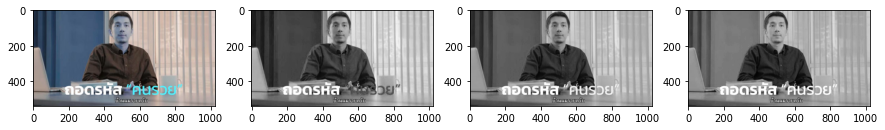

In [5]:
bb = imgCv
b = bb[:, :, 0]

gg = imgCv
g = gg[:, :, 1]

rr = imgCv
r = rr[:, :, 2]

f, axarr = plt.subplots(1,4)

f.set_figheight(15)
f.set_figwidth(15)
axarr[0].imshow(imgCv)
axarr[1].imshow(b, cmap='gray')
axarr[2].imshow(g, cmap='gray')
axarr[3].imshow(r, cmap='gray')

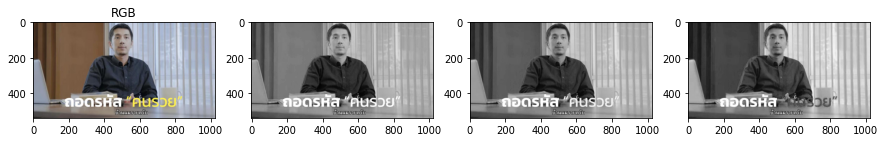

In [13]:
rr = imgPlt
r = rr[:, :, 0]

gg = imgPlt
g = gg[:, :, 1]

bb = imgPlt
b = bb[:, :, 2]

f, axarr = plt.subplots(1,4)
f.set_figheight(15)
f.set_figwidth(15)
axarr[0].title.set_text("RGB")
axarr[0].imshow(imgPlt)
axarr[1].imshow(r, cmap='gray')
axarr[2].imshow(g, cmap='gray')
axarr[3].imshow(b, cmap='gray')


**1.2 : Image Reshape**

In [7]:
imgarray = np.array(imgCv)
imgarrayReshape = imgarray.transpose()
print('OpenCV  (H, W, C)')
print(imgarray.shape)
print('Pytorch (C, H, W)')
print(imgarrayReshape.shape)

OpenCV  (H, W, C)
(538, 1024, 3)
Pytorch (C, H, W)
(3, 1024, 538)


**1.3 : Reduce Bit Depth using Quantization**

Qlevel is : 8
Ched : 31
[[ 84  58  41]
 [ 86  60  43]
 [ 87  61  44]
 ...
 [199 202 217]
 [198 202 214]
 [198 202 214]]

[[ 62  31  31]
 [ 62  31  31]
 [ 62  31  31]
 ...
 [186 186 186]
 [186 186 186]
 [186 186 186]]


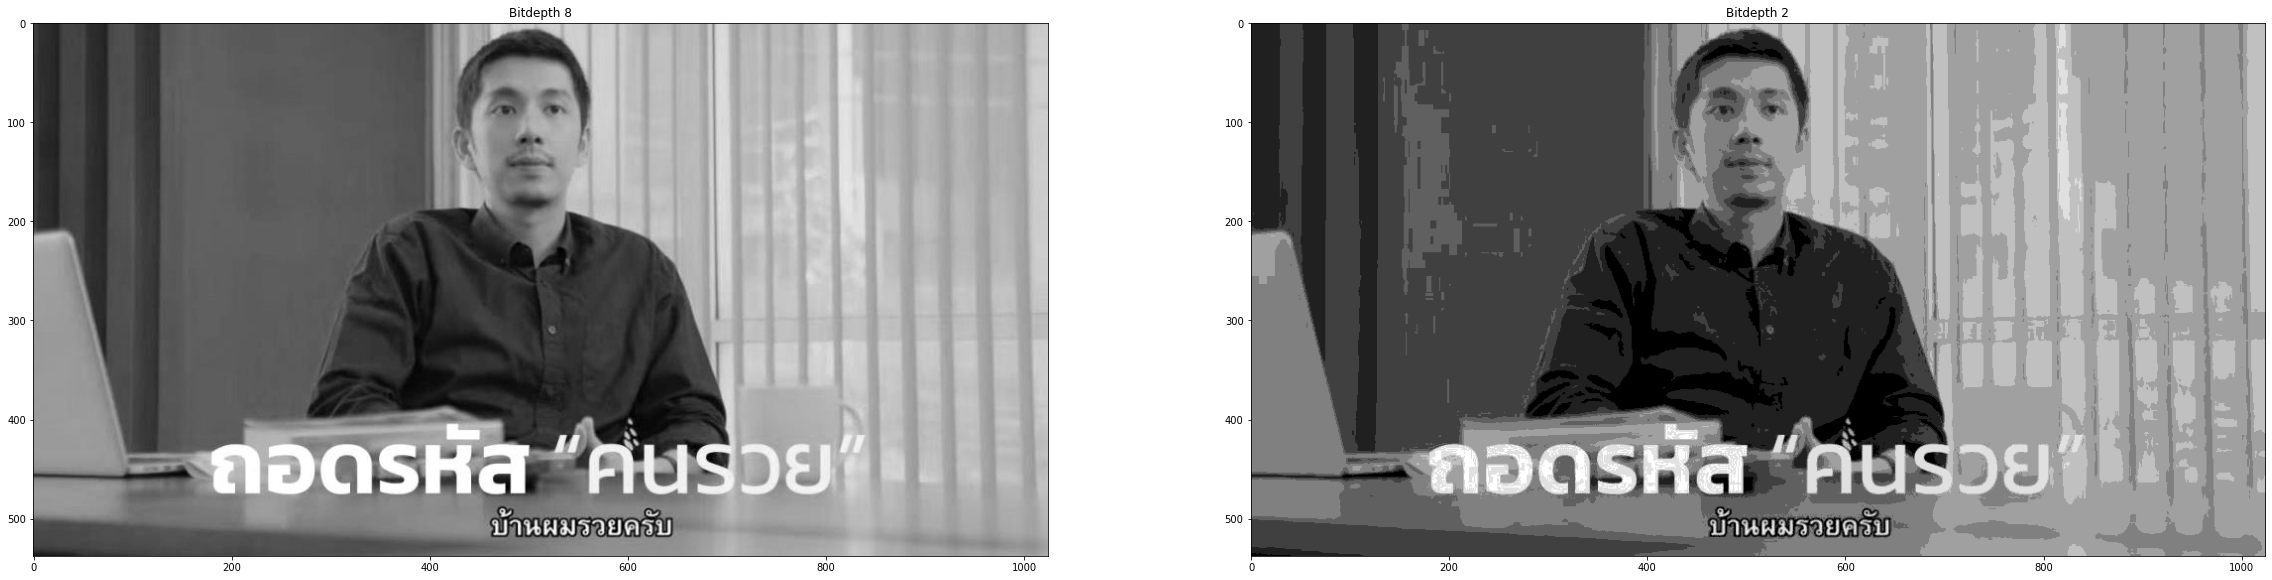

In [8]:
bitdepth = 3
qlevel = 2**bitdepth

src_img = np.array(imgPlt)
print('Qlevel is : ' + str(qlevel))

shiftRange = int(255/qlevel)
print('Ched :', shiftRange)

print(src_img[0])
src_img_reduce = ((src_img/255)*qlevel)
src_img_reduce = (np.floor(src_img_reduce).astype(int))*shiftRange

print()
print(src_img_reduce[0])

f, axarr = plt.subplots(1,2)
f.set_figheight(40)
f.set_figwidth(40)
axarr[0].title.set_text('Bitdepth 8')
axarr[0].imshow(src_img[:,:,1], cmap='gray')
axarr[1].title.set_text('Bitdepth 2')
axarr[1].imshow(src_img_reduce[:,:,1], cmap='gray')

**1.4 : 3D Image Surface**

(538, 1024)
(300, 300)
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [297 297 297 ... 297 297 297]
 [298 298 298 ... 298 298 298]
 [299 299 299 ... 299 299 299]]
[[  0   1   2 ... 297 298 299]
 [  0   1   2 ... 297 298 299]
 [  0   1   2 ... 297 298 299]
 ...
 [  0   1   2 ... 297 298 299]
 [  0   1   2 ... 297 298 299]
 [  0   1   2 ... 297 298 299]]


/tmp/ipykernel_28138/305358033.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


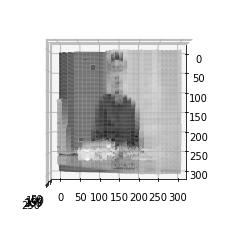

In [9]:
img3d = cv.imread("pic.jpg", 0)
print(img3d.shape)
img3d = cv.resize(img3d, (300,300))
print(img3d.shape)
xx, yy = np.mgrid[0:img3d.shape[0], 0:img3d.shape[1]]

print(xx)
print(yy)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, img3d ,rstride=2,cstride=10, cmap='gray' ,linewidth=10)

ax.view_init(90,0)